In [101]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
std_df = pd.read_csv("F:\dataset_for_ML\supervised\student_performance_prediction\student_performance_prediction.csv")

In [3]:
temp_df = std_df.copy()

In [4]:
temp_df.isna().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [5]:
temp_df.duplicated().sum()

0

In [6]:
temp_df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [7]:
temp_df.drop(columns="Student ID",inplace=True)

In [8]:
numerical_columns = ["Study Hours per Week","Attendance Rate","Previous Grades"]
categorical_columns = ["Participation in Extracurricular Activities","Parent Education Level","Passed"]

In [9]:
imputer = ColumnTransformer(
    transformers=[
        ("Simple Imputer Mean",SimpleImputer(strategy="mean"),numerical_columns),
        ("Simple Imputer String",SimpleImputer(strategy="most_frequent"),categorical_columns)

    ],remainder="passthrough"
)

In [10]:
imputed_dataset = imputer.fit_transform(temp_df)

In [11]:
imputed_dataset 


array([[12.5, 75.27632340559882, 75.0, 'Yes', 'Master', 'Yes'],
       [9.3, 95.3, 60.6, 'No', 'High School', 'No'],
       [13.2, 75.27632340559882, 64.0, 'No', 'Associate', 'No'],
       ...,
       [13.1, 65.6, 38.1, 'No', 'Bachelor', 'No'],
       [14.1, 74.9, 65.44010682523812, 'Yes', 'Master', 'No'],
       [11.8, 55.1, 68.5, 'No', 'Bachelor', 'Yes']], dtype=object)

In [12]:
new_df = pd.DataFrame(imputed_dataset,columns=temp_df.columns)

In [13]:
new_df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12.5,75.276323,75.0,Yes,Master,Yes
1,9.3,95.3,60.6,No,High School,No
2,13.2,75.276323,64.0,No,Associate,No
3,17.6,76.8,62.4,Yes,Bachelor,No
4,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...
39995,15.6,93.8,51.4,Yes,Master,No
39996,11.3,66.4,64.2,No,Doctorate,Yes
39997,13.1,65.6,38.1,No,Bachelor,No
39998,14.1,74.9,65.440107,Yes,Master,No


In [14]:
new_df.isna().sum()

Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Study Hours per Week                         40000 non-null  object
 1   Attendance Rate                              40000 non-null  object
 2   Previous Grades                              40000 non-null  object
 3   Participation in Extracurricular Activities  40000 non-null  object
 4   Parent Education Level                       40000 non-null  object
 5   Passed                                       40000 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [16]:
columns_to_convert = ["Study Hours per Week","Attendance Rate","Previous Grades"]
for column in columns_to_convert:
    new_df[column] = new_df[column].astype("Float64")

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         40000 non-null  Float64
 1   Attendance Rate                              40000 non-null  Float64
 2   Previous Grades                              40000 non-null  Float64
 3   Participation in Extracurricular Activities  40000 non-null  object 
 4   Parent Education Level                       40000 non-null  object 
 5   Passed                                       40000 non-null  object 
dtypes: Float64(3), object(3)
memory usage: 1.9+ MB


In [18]:
new_df = new_df.round(2)

In [19]:
new_df.sample(10)

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
428,9.96,91.0,53.8,No,Bachelor,Yes
19283,8.4,69.1,67.2,No,Associate,Yes
4852,12.7,70.6,77.8,No,Bachelor,Yes
18492,10.2,67.1,29.0,Yes,Doctorate,Yes
9074,20.3,39.6,63.6,No,High School,No
16187,10.8,101.4,88.2,Yes,Bachelor,Yes
39700,14.2,77.3,35.2,No,Doctorate,Yes
34348,13.6,114.2,64.7,No,High School,No
28243,15.1,37.1,82.2,No,Bachelor,No
27730,11.7,90.6,71.5,No,Master,No


In [20]:
numerical_cols = new_df.iloc[:,0:3]

In [21]:
numerical_cols.shape

(40000, 3)

<Axes: >

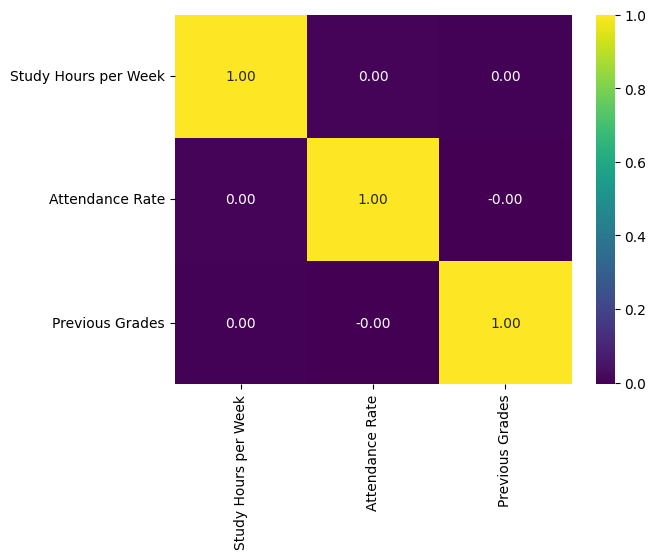

In [22]:
sns.heatmap(numerical_cols.corr(),cmap='viridis',annot=True,fmt='.2f')

In [23]:
new_df.select_dtypes("float").describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,40000.0,40000.0,40000.0
mean,9.962608,75.276507,65.440101
std,4.904082,19.879124,16.08651
min,-12.3,-14.3,8.3
25%,6.8,62.4,55.7
50%,9.96,75.28,65.44
75%,13.2,87.9,74.6
max,32.4,150.2,200.0


<Axes: >

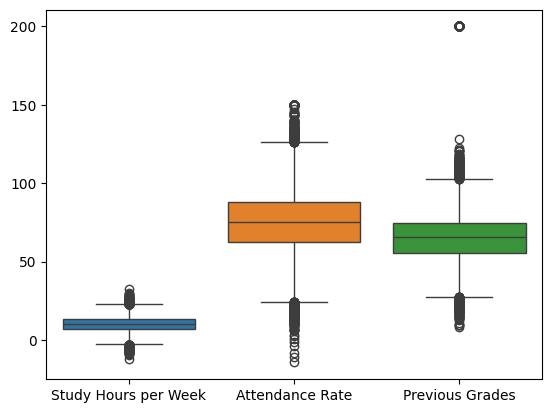

In [24]:
sns.boxplot(new_df.select_dtypes("float"))

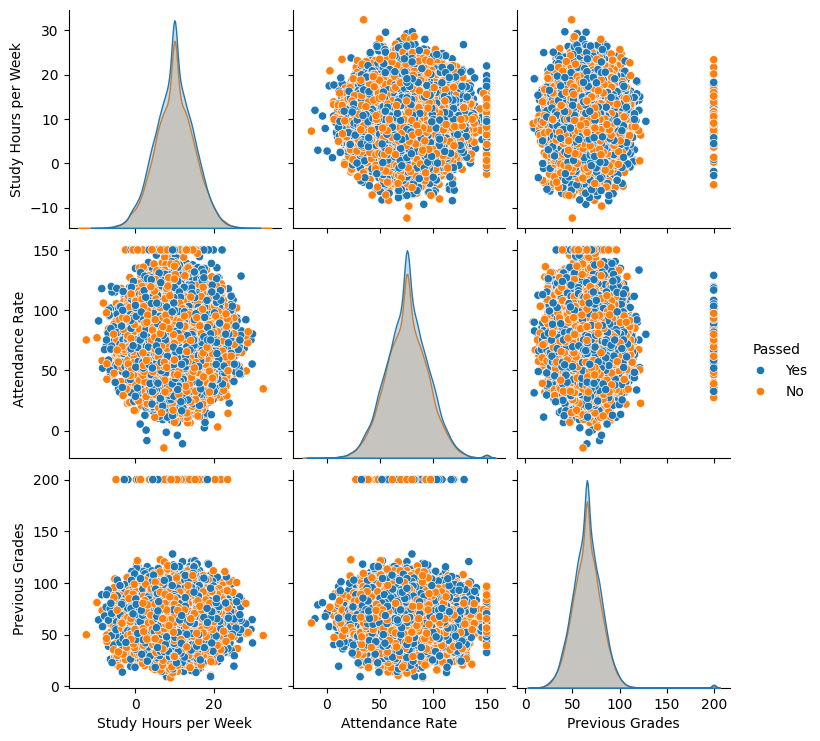

In [25]:
sns.pairplot(new_df[new_df.select_dtypes("float").columns.tolist() + ["Passed"]],hue="Passed")

In [26]:
def z_score_outlier_removal(df, numeric_cols, threshold=3):
    df_copy = df.copy()
    mask = pd.Series(True, index=df_copy.index)
    
    for col in numeric_cols:
        z_scores = np.abs(df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
        mask &= (z_scores < threshold)
    
    return df_copy[mask]


filtered_df = z_score_outlier_removal(new_df, numeric_cols=['Study Hours per Week', 'Attendance Rate','Previous Grades'])

In [27]:
filtered_df.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12.5,75.28,75.0,Yes,Master,Yes
1,9.3,95.3,60.6,No,High School,No
2,13.2,75.28,64.0,No,Associate,No
3,17.6,76.8,62.4,Yes,Bachelor,No
4,8.8,89.3,72.7,No,Master,No


In [28]:
filtered_df.select_dtypes("float").describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,39513.0,39513.0,39513.0
mean,9.963832,75.131121,65.094701
std,4.823677,19.283377,14.511317
min,-4.7,15.7,17.8
25%,6.8,62.4,55.7
50%,9.96,75.28,65.44
75%,13.2,87.8,74.4
max,24.6,134.7,113.4


In [29]:
# there will be no negative Study hours, so let's remove it ! 


In [30]:
filtered_df = filtered_df[filtered_df["Study Hours per Week"]>0]

In [31]:
filtered_df.select_dtypes("float").describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38610.0,38610.0,38610.0
mean,10.231329,75.151153,65.091717
std,4.543945,19.293994,14.50321
min,0.1,15.7,17.8
25%,7.0,62.4,55.7
50%,9.96,75.28,65.44
75%,13.3,87.8,74.4
max,24.6,134.7,113.4


<Axes: >

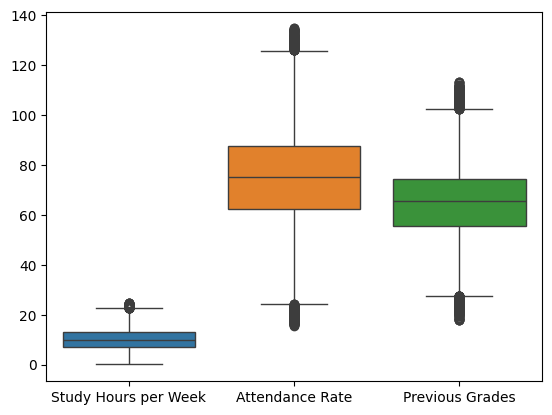

In [32]:
sns.boxplot(filtered_df.select_dtypes('float'))

In [33]:
########## there are still some outliers, but lets keep itt ! lets check for the corr ! 


In [34]:
filtered_df.select_dtypes("float").corr()

,Study Hours per Week,Attendance Rate,Previous Grades
Study Hours per Week,1.000000,0.006596,0.004660
Attendance Rate,0.006596,1.000000,-0.006006
Previous Grades,0.004660,-0.006006,1.000000


very much weak coorelation 

In [35]:
numerical_columns

['Study Hours per Week', 'Attendance Rate', 'Previous Grades']

In [36]:
scaling = ColumnTransformer(
    transformers=[
        ("StandardScaler",StandardScaler(),numerical_columns)
    ],remainder="passthrough"
)

In [37]:
scaled_df = pd.DataFrame(scaling.fit_transform(filtered_df),columns=filtered_df.columns)

In [42]:
scaled_df.sample(10)

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
27487,1.731705,1.106517,2.138057,No,High School,Yes
14940,0.829394,0.012898,-0.36487,No,Master,No
7855,-0.667123,0.006678,0.890041,No,Doctorate,No
25575,-0.059713,0.121741,-0.047695,No,Doctorate,Yes
32160,0.807386,-1.500546,-0.440716,No,Master,Yes
22041,-0.059713,0.738522,-1.047486,No,High School,No
28367,1.291553,1.391583,0.717663,No,Associate,Yes
16620,0.125151,0.588214,0.586656,No,Bachelor,No
10770,-0.059713,0.006678,0.024015,No,High School,Yes
17997,-2.097616,-1.023708,0.024015,Yes,Associate,Yes


0        0.499280
1       -0.204963
2        0.653333
3        1.621667
4       -0.315001
           ...   
38605    1.181515
38606    0.235189
38607    0.631326
38608    0.851401
38609    0.345227
Name: Study Hours per Week, Length: 38610, dtype: float64

In [46]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38610 entries, 0 to 38609
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Study Hours per Week                         38610 non-null  object
 1   Attendance Rate                              38610 non-null  object
 2   Previous Grades                              38610 non-null  object
 3   Participation in Extracurricular Activities  38610 non-null  object
 4   Parent Education Level                       38610 non-null  object
 5   Passed                                       38610 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [47]:
columns_to_convert = ["Study Hours per Week","Attendance Rate","Previous Grades"]
for column in columns_to_convert:
    scaled_df[column] = scaled_df[column].astype("Float64")

In [48]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38610 entries, 0 to 38609
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         38610 non-null  Float64
 1   Attendance Rate                              38610 non-null  Float64
 2   Previous Grades                              38610 non-null  Float64
 3   Participation in Extracurricular Activities  38610 non-null  object 
 4   Parent Education Level                       38610 non-null  object 
 5   Passed                                       38610 non-null  object 
dtypes: Float64(3), object(3)
memory usage: 1.9+ MB


In [52]:
scaled_df.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,0.49928,0.006678,0.683187,Yes,Master,Yes
1,-0.204963,1.04432,-0.309709,No,High School,No
2,0.653333,0.006678,-0.075275,No,Associate,No
3,1.621667,0.08546,-0.185597,Yes,Bachelor,No
4,-0.315001,0.733339,0.5246,No,Master,No


In [53]:
scaled_df["Parent Education Level"].value_counts()

Parent Education Level
Bachelor       9354
High School    7426
Associate      7354
Doctorate      7335
Master         7141
Name: count, dtype: int64

In [58]:
forOrdinalColumns = ["High School","Associate","Bachelor","Master","Doctorate"]
encoder = ColumnTransformer(
    transformers=[
        ("ordinalEncoder",OrdinalEncoder(categories=[forOrdinalColumns]),["Parent Education Level"]),
        ("OneHotEncoding",OneHotEncoder(drop="first"),["Participation in Extracurricular Activities"])
    ],remainder="passthrough"
)

In [59]:
scaled_encoded_df = encoder.fit_transform(scaled_df)

In [60]:
scaled_encoded_df

array([[3.0, 1.0, 0.4992799786546273, 0.006678198252785686,
        0.6831874674224093, 'Yes'],
       [0.0, 0.0, -0.20496303420634765, 1.0443202332074268,
        -0.30970905172021784, 'No'],
       [1.0, 0.0, 0.6533331377179655, 0.006678198252785686,
        -0.07527515136709764, 'No'],
       ...,
       [2.0, 0.0, 0.6313255435660601, -0.49503882963737095,
        -1.861109862880573, 'No'],
       [3.0, 1.0, 0.8514014850851148, -0.013017304908191286,
        0.024014500547164922, 'No'],
       [2.0, 0.0, 0.34522681959128915, -1.0392566801380565,
        0.23500501086497336, 'Yes']], dtype=object)

In [62]:
final_df = pd.DataFrame(scaled_encoded_df,columns=scaled_df.columns)

In [63]:
final_df.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,3.0,1.0,0.49928,0.006678,0.683187,Yes
1,0.0,0.0,-0.204963,1.04432,-0.309709,No
2,1.0,0.0,0.653333,0.006678,-0.075275,No
3,2.0,1.0,1.621667,0.08546,-0.185597,No
4,3.0,0.0,-0.315001,0.733339,0.5246,No


In [65]:
le = LabelEncoder()
encoded_passed_col = le.fit_transform(final_df["Passed"])

In [66]:
final_df["passed_enc"] = encoded_passed_col

In [67]:
final_df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,passed_enc
0,3.0,1.0,0.49928,0.006678,0.683187,Yes,1
1,0.0,0.0,-0.204963,1.04432,-0.309709,No,0
2,1.0,0.0,0.653333,0.006678,-0.075275,No,0
3,2.0,1.0,1.621667,0.08546,-0.185597,No,0
4,3.0,0.0,-0.315001,0.733339,0.5246,No,0
...,...,...,...,...,...,...,...
38605,3.0,1.0,1.181515,0.966575,-0.94406,No,0
38606,4.0,0.0,0.235189,-0.453575,-0.061485,Yes,1
38607,2.0,0.0,0.631326,-0.495039,-1.86111,No,0
38608,3.0,1.0,0.851401,-0.013017,0.024015,No,0


In [72]:
final_df.drop(columns="Passed",inplace=True)

In [73]:
final_df.sample(10)

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,passed_enc
10091,1.0,1.0,-0.6011,0.453455,0.752139,1
21685,2.0,0.0,-0.059713,0.018081,-0.240758,1
26380,0.0,1.0,1.093485,0.173572,-0.68894,0
18484,1.0,0.0,-0.799168,0.790352,0.621131,1
3888,0.0,1.0,-0.13894,1.588538,-0.730311,1
1218,0.0,0.0,1.797728,-0.287718,0.910726,1
6590,3.0,1.0,0.367234,0.37571,0.517705,1
7073,4.0,1.0,0.41125,0.043996,-0.268338,0
23424,2.0,1.0,-1.657464,-1.360604,-1.033696,1
31329,1.0,1.0,0.49928,1.479695,-0.206282,0


In [77]:
X = final_df.iloc[:,:-1]
y = final_df["passed_enc"]

In [78]:
X

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level
0,3.0,1.0,0.49928,0.006678,0.683187
1,0.0,0.0,-0.204963,1.04432,-0.309709
2,1.0,0.0,0.653333,0.006678,-0.075275
3,2.0,1.0,1.621667,0.08546,-0.185597
4,3.0,0.0,-0.315001,0.733339,0.5246
...,...,...,...,...,...
38605,3.0,1.0,1.181515,0.966575,-0.94406
38606,4.0,0.0,0.235189,-0.453575,-0.061485
38607,2.0,0.0,0.631326,-0.495039,-1.86111
38608,3.0,1.0,0.851401,-0.013017,0.024015


In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Using logistic regression 

In [82]:
lr = LogisticRegression()

In [83]:
lr.fit(X_train,y_train)

LogisticRegression()

In [85]:
lr_pred = lr.predict(X_test)

In [86]:
accuracy_score(lr_pred,y_test)

0.5297850297850298

In [88]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.523989898989899, 0.5297850297850298)

Definitely a progress than before ! Lets use random Forest classifier using gridSearchCV 

In [ ]:
param_Grid = {
    "n_estimators": [100,200,500],
    "max_depth": [5,10],
    # "min_samples_split": [2, 5],
    # "min_samples_leaf": [1, 2]
}
rfc = RandomForestClassifier(random_state=42)

random_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_Grid,
 
    cv=5,

    # n_jobs=-1
)

In [116]:
random_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10], 'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [117]:
print(random_search.best_params_)
print(random_search.best_score_)

{'max_depth': 5, 'n_estimators': 500}
0.5233748112561385


In [118]:
rf = RandomForestClassifier(n_estimators=500,max_depth=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [119]:
rf_pred = rf.predict(X_test)

In [121]:
accuracy_score(rf_pred,y_test)

0.5305620305620306

In [122]:
param_grid_decision_tree = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_decision_tree,
    cv=5,
    scoring='accuracy'
)


In [123]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [124]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=3, random_state=42)
0.5233099553251384


In [125]:
model_dtc = DecisionTreeClassifier(random_state=42,max_depth=3,criterion='gini',min_samples_split=2,min_samples_leaf=1)

In [126]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [127]:
model_dtc_pred = model_dtc.predict(X_test)

In [128]:
model_dtc_pred

array([1, 1, 1, ..., 1, 1, 1])

In [129]:
accuracy_score(model_dtc_pred,y_test)

0.5259000259000259

In [130]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all cores
)


In [131]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [132]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.5071547962493932


In [135]:
knn_param = KNeighborsClassifier(metric="manhattan",n_neighbors=9,weights="distance")

In [136]:
knn_param.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [138]:
knn_pred = knn_param.predict(X_test)

In [139]:
accuracy_score(knn_pred,y_test)

0.497021497021497